## Voting Classifiers

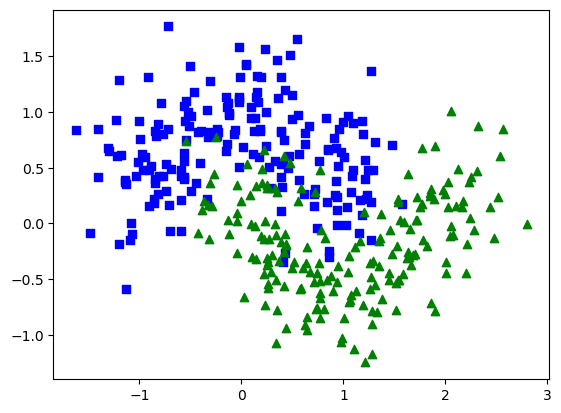

In [1]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=500, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X0 = X_train[y_train == 0].transpose()
X1 = X_train[y_train == 1].transpose()

plt.scatter(X0[0], X0[1], c='b', marker='s')
plt.scatter(X1[0], X1[1], c='g', marker='^')
plt.show()

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC(probability=True)

voting_clf = VotingClassifier(
                estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
                voting='soft')

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('svc', SVC(probability=True))],
                 voting='soft')

In [3]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.912
SVC 0.896
VotingClassifier 0.912


## Bagging and Pasting

In [4]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.904

### Out-of-Bag Evaluation

In [5]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, bootstrap=True, n_jobs=-1, oob_score=True)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.9013333333333333

In [6]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.912

In [7]:
bag_clf.oob_decision_function_

array([[0.38709677, 0.61290323],
       [0.28571429, 0.71428571],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.08648649, 0.91351351],
       [0.37234043, 0.62765957],
       [0.01      , 0.99      ],
       [0.99456522, 0.00543478],
       [0.94210526, 0.05789474],
       [0.78350515, 0.21649485],
       [0.0212766 , 0.9787234 ],
       [0.74585635, 0.25414365],
       [0.83615819, 0.16384181],
       [0.96891192, 0.03108808],
       [0.05487805, 0.94512195],
       [0.        , 1.        ],
       [0.99056604, 0.00943396],
       [0.95294118, 0.04705882],
       [0.98360656, 0.01639344],
       [0.02590674, 0.97409326],
       [0.30898876, 0.69101124],
       [0.89142857, 0.10857143],
       [1.        , 0.        ],
       [0.97340426, 0.02659574],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.68269231, 0.31730769],
       [0.

### Random Patches and Random Subspaces

The <b>BaggingClassifier</b> class supports sampling the features as well. <br>
This is particularly useful when you are dealing with high-dimensional inputs (such
as images). Sampling both training instances and features is called the Random
Patches method. <br>
Keeping all training instances but sampling features. <br>

## Random Forests

In [8]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
# Roughly equivalent to: (However, RandomForestClassifier class is more convenient and optimized for Decision Trees)
# bag_clf = BaggingClassifier(
#                DecisionTreeClassifier(splitter="random", max_leaf_nodes=16),
#                n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1)

rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.912

### Extra-Trees

It is possible to make trees even more random by also using random thresholds
for each feature rather than searching for the best possible thresholds. <br>
A forest of such extremely random trees is simply called
an <b>Extremely Randomized Trees ensemble</b> (or Extra-Trees for short). <br>
You can create an Extra-Trees classifier using Scikit-Learn’s <b>ExtraTreesClassifier</b> class. <br>

### Feature Importance

In [9]:
from sklearn.datasets import load_iris

iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.0943951916771462
sepal width (cm) 0.023785457963545486
petal length (cm) 0.4282876085188904
petal width (cm) 0.4535317418404179


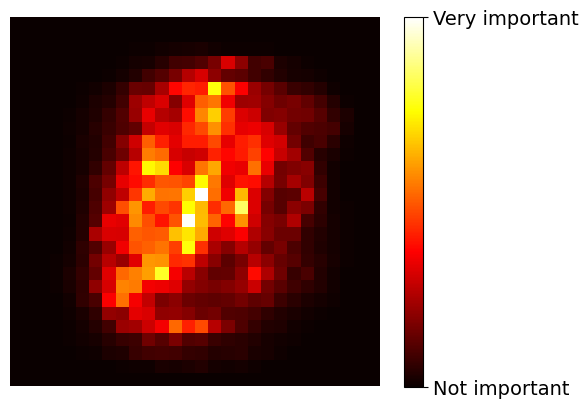

In [10]:
from sklearn.datasets import fetch_openml

X_mnist, y_mnist = fetch_openml('mnist_784', return_X_y=True, as_frame=False, parser='auto')

rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(X_mnist, y_mnist)

heatmap_image = rnd_clf.feature_importances_.reshape(28, 28)
plt.imshow(heatmap_image, cmap="hot")
cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(),
                           rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'], fontsize=14)
plt.axis("off")
plt.show()

## Boosting

### AdaBoost

In [11]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(
            DecisionTreeClassifier(max_depth=1), n_estimators=200,
            algorithm="SAMME.R", learning_rate=0.5)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

In [12]:
accuracy_score(y_test, y_pred)

0.912

If your AdaBoost ensemble is overfitting the training set, you can
try reducing the number of estimators or more strongly regularizing the base estimator.

### Gradient Boosting

In [13]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3 * X[:, 0] ** 2 + 0.05 * np.random.randn(100)  # y = 3x² + Gaussian noise

tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X, y)

y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X, y2)

y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X, y3)

X_new = np.array([[-0.4], [0.], [0.5]])
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))
y_pred

array([0.49484029, 0.04021166, 0.75026781])

In [14]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_traing, X_valg, y_traing, y_valg = train_test_split(X, y)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120)
gbrt.fit(X_traing, y_traing)

errors = [mean_squared_error(y_valg, y_predg) for y_predg in gbrt.staged_predict(X_valg)]

# Get best number of estimators using early stopping
bst_n_estimators = np.argmin(errors)

gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators)
gbrt_best.fit(X_traing, y_traing)

GradientBoostingRegressor(max_depth=2, n_estimators=52)

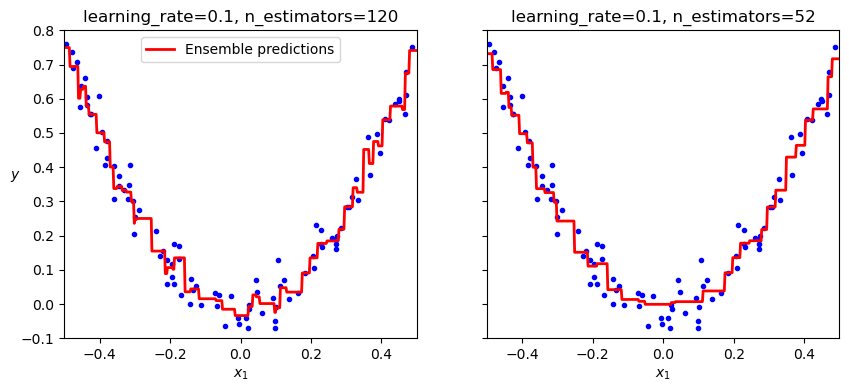

In [15]:
import matplotlib.pyplot as plt

def plot_predictions(regressors, X, y, axes, style,
                     label=None, data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_predg = sum(regressor.predict(x1.reshape(-1, 1))
                 for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_predg, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center")
    plt.axis(axes)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plot_predictions([gbrt], X, y, axes=[-0.5, 0.5, -0.1, 0.8], style="r-",
                 label="Ensemble predictions")
plt.title(f"learning_rate={gbrt.learning_rate}, "
          f"n_estimators={gbrt.n_estimators_}")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)

plt.sca(axes[1])
plot_predictions([gbrt_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8], style="r-")
plt.title(f"learning_rate={gbrt_best.learning_rate}, "
          f"n_estimators={gbrt_best.n_estimators_}")
plt.xlabel("$x_1$")

plt.show()

In [16]:
# Alternative way to perform early stopping

#gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True)
#min_val_error = float("inf")
#error_going_up = 0
#for n_estimators in range(1, 120):
#    gbrt.n_estimators = n_estimators
#    gbrt.fit(X_train, y_train)
#    y_pred = gbrt.predict(X_val)
#    val_error = mean_squared_error(y_val, y_pred)
#    if val_error < min_val_error:
#        min_val_error = val_error
#        error_going_up = 0
#    else:
#        error_going_up += 1
#        if error_going_up == 5:
#            break # early stopping

The GradientBoostingRegressor class also supports a <i>subsample</i> hyperparameter,
which specifies the fraction of training instances to be used for training each tree. <br>
This technique is called <b>Stochastic Gradient Boosting</b>.

It is worth noting that an optimized implementation of Gradient Boosting is available
in the popular python library <a href='https://github.com/dmlc/xgboost'><b>XGBoost</b></a>

### Stacking

In [17]:
from sklearn.ensemble import StackingClassifier

stacking_clf = StackingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(probability=True, random_state=42))
    ],
    final_estimator=RandomForestClassifier(random_state=43),
    cv=5  # number of cross-validation folds
)
stacking_clf.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression(random_state=42)),
                               ('rf', RandomForestClassifier(random_state=42)),
                               ('svc', SVC(probability=True, random_state=42))],
                   final_estimator=RandomForestClassifier(random_state=43))